## Bibliotecas

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pytz

# Análises de Series Temporais

In [12]:
path = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.1373/dados?formato=csv'
dados = pd.read_csv(path, sep=';')
dados


,data,valor
0,01/01/1993,66168
1,01/02/1993,73042
2,01/03/1993,98691
3,01/04/1993,88839
4,01/05/1993,101055
...,...,...
368,01/09/2023,208889
369,01/10/2023,199758
370,01/11/2023,202675
371,01/12/2023,171578


In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    373 non-null    object
 1   valor   373 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.0+ KB


In [18]:
dataparse = lambda dates: pd.to_datetime(dates, format='%d/%m/%Y')
dados = pd.read_csv(path, sep=';', parse_dates=['data'], index_col='data', date_parser=dataparse)
dados


/tmp/ipykernel_55667/4251530318.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dados = pd.read_csv(path, sep=';', parse_dates=['data'], index_col='data', date_parser=dataparse)


,valor
data,
1993-01-01,66168
1993-02-01,73042
1993-03-01,98691
1993-04-01,88839
1993-05-01,101055
...,...
2023-09-01,208889
2023-10-01,199758
2023-11-01,202675


In [20]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373 entries, 1993-01-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   valor   373 non-null    int64
dtypes: int64(1)
memory usage: 5.8 KB


## Plot dados

<Axes: xlabel='data'>

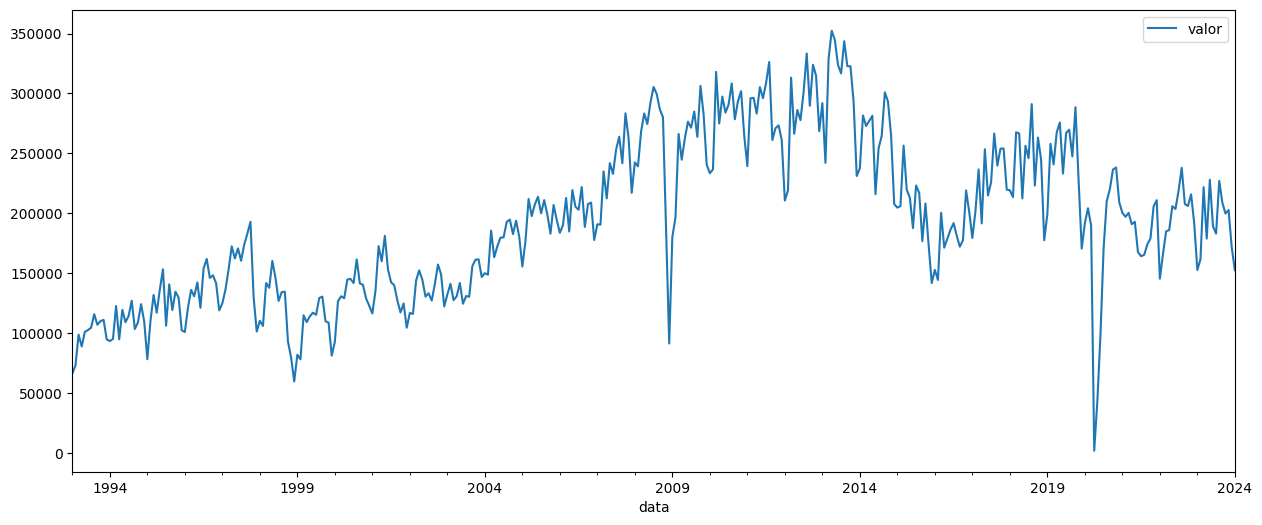

In [22]:
dados.plot(figsize=(15,6))

### Faça a **Análise de Estacionariedade(ADFULLER)** para os seguintes periodos:
 - Bimestral
 - Trimestral
   
Pra isso, fazer o RESAMPLE (DOWNSAMPLING) para:

# PERIODO: BIMESTRAL

In [24]:
bimestral = dados.resample('2M').mean()
bimestral.head(10)

,valor
data,
1993-01-31,66168.0
1993-03-31,85866.5
1993-05-31,94947.0
1993-07-31,103502.5
1993-09-30,111395.0
1993-11-30,110516.0
1994-01-31,94017.5
1994-03-31,108830.0
1994-05-31,107130.5


<Axes: xlabel='data'>

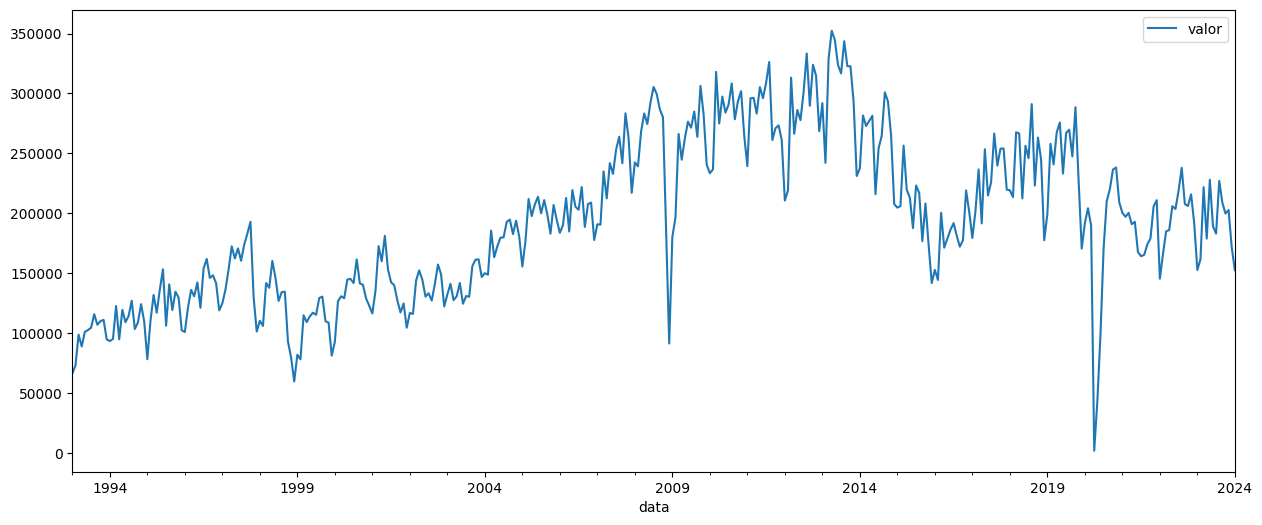

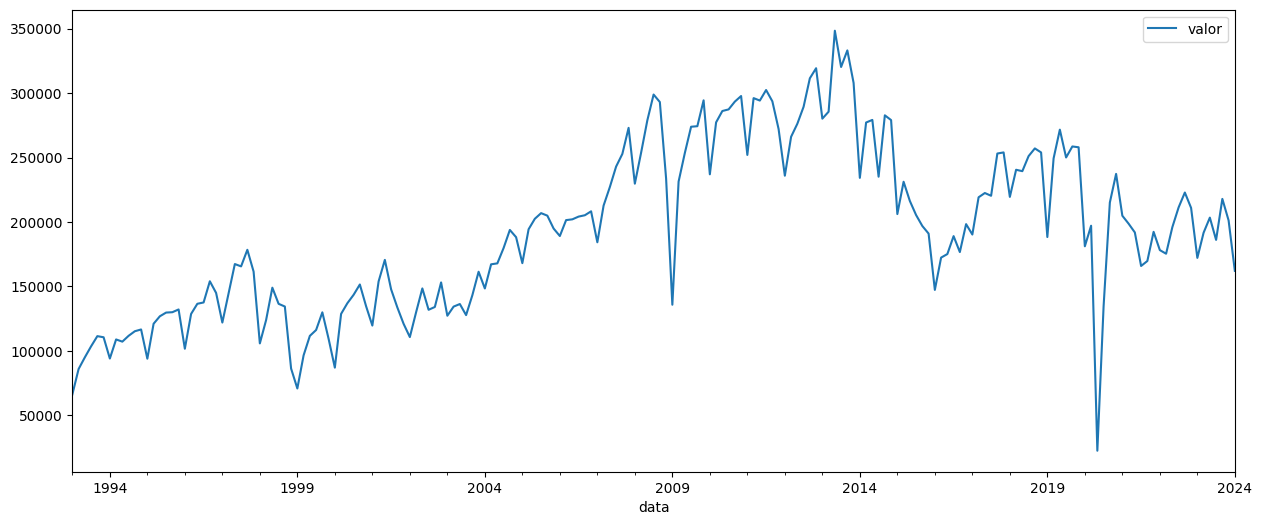

In [28]:
dados.plot(figsize=(15,6))
bimestral.plot(figsize=(15,6))

# # PERIODO:Trimestral

In [29]:
trimestre = dados.resample('3M').mean()
trimestre.head(10)

,valor
data,
1993-01-31,66168.000000
1993-04-30,86857.333333
1993-07-31,102686.666667
1993-10-31,110926.333333
1994-01-31,99692.666667
1994-04-30,104160.000000
1994-07-31,114243.333333
1994-10-31,113129.333333
1995-01-31,103976.000000


### Faça a **Análise de Tendência(ROLLING)** para as seguintes **Janelas Móveis**:
 - Bimestral
 - Trimestral


# PERIODO: TRIMESTRAL

In [56]:
rolling_mean = dados['valor'].rolling(window=3, min_periods=1).mean().shift(3)
rolling_mean.head(20)

data
1993-01-01              NaN
1993-02-01              NaN
1993-03-01              NaN
1993-04-01     66168.000000
1993-05-01     69605.000000
1993-06-01     79300.333333
1993-07-01     86857.333333
1993-08-01     96195.000000
1993-09-01     97468.666667
1993-10-01    102686.666667
1993-11-01    107601.666667
1993-12-01    109094.333333
1994-01-01    110926.333333
1994-02-01    109340.666667
1994-03-01    105236.666667
1994-04-01     99692.666667
1994-05-01     94365.000000
1994-06-01    103672.333333
1994-07-01    104160.000000
1994-08-01    112287.000000
Name: valor, dtype: float64

## Análise de Sazonalidade

<Axes: xlabel='data'>

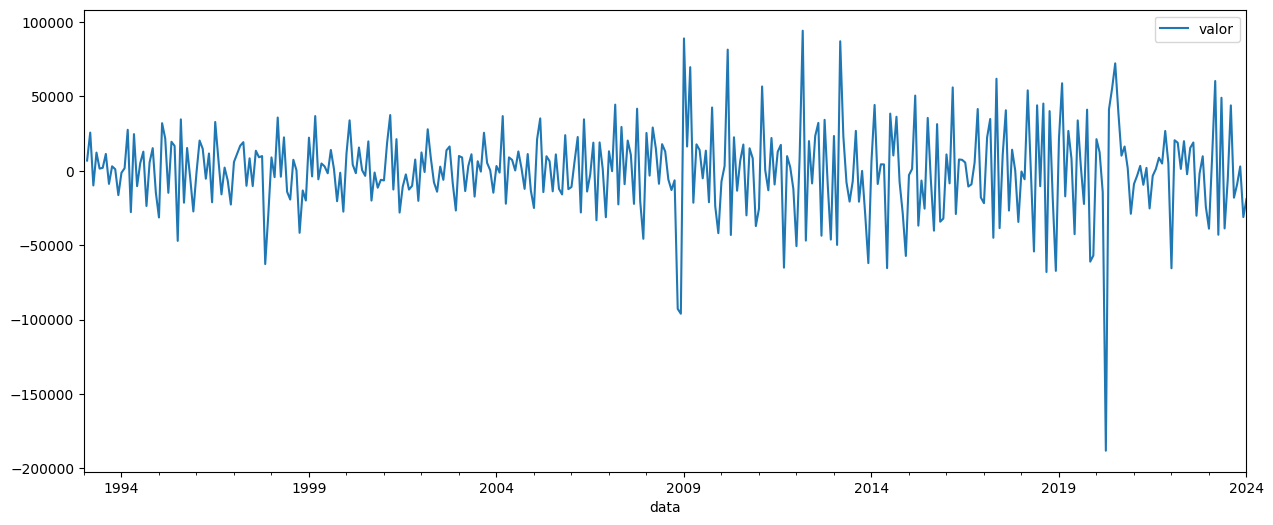

In [59]:
dados.diff().plot(figsize=(15,6))

<Axes: xlabel='data'>

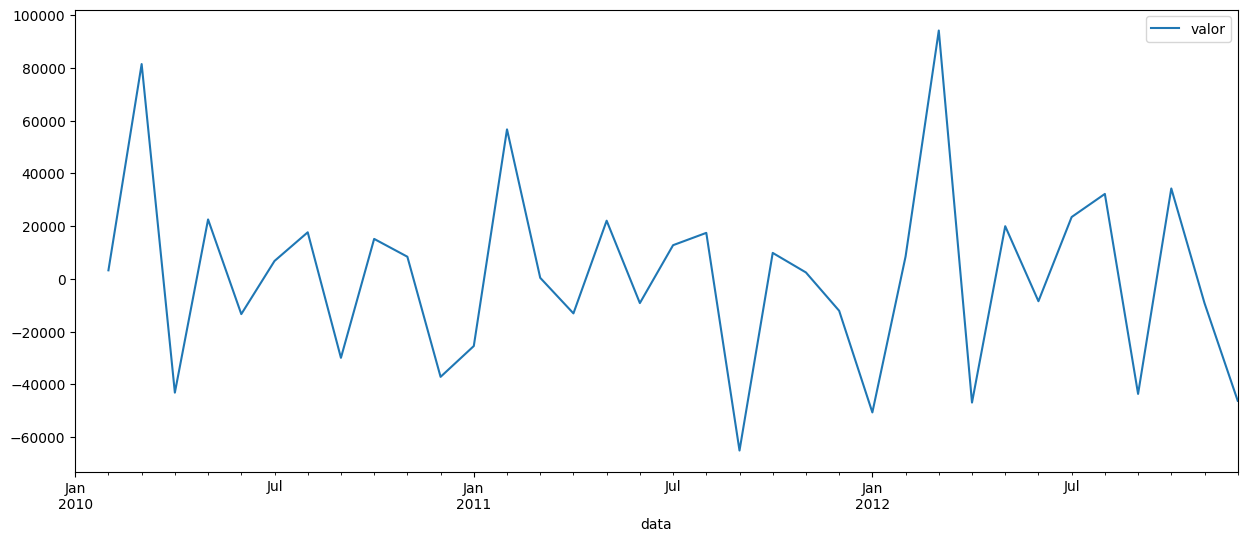

In [63]:
filtro = (dados.index.year >=2010) & (dados.index.year <=2012)

dados[filtro].diff().plot(figsize=(15,6))